In [560]:
from collections import defaultdict, Counter, OrderedDict
import numpy as np
from copy import copy, deepcopy
from itertools import groupby, permutations, product, combinations
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import re
from time import sleep, time
from matplotlib import pyplot as plt
from matplotlib import colors
from collections import deque


In [405]:
defaultdict(list)

defaultdict(list, {})

# DATA

In [406]:
f = open("inputs/aoc16.txt").read().replace("\n","")

In [407]:
len(f)

12100

In [408]:
text_input = r""".|...\....
|.-.\.....
.....|-...
........|.
..........
.........\
..../.\\..
.-.-/..|..
.|....-|.\
..//.|....
"""
text_input = text_input.replace("\n","")

In [409]:
text_input

'.|...\\....|.-.\\..........|-...........|....................\\..../.\\\\...-.-/..|...|....-|.\\..//.|....'

In [561]:
class P:
    
    def __init__(self):
        self.results = []
        self.counter = 0
        self.incoming_beams = []        

        self.directions = [
            ((0,-1),".",[(0,-1)]),
            ((0,1),".",[(0,1)]),
            ((1,0),".",[(1,0)]),
            ((-1,0),".",[(-1,0)]),
            ((0,-1),"\\",[(-1,0)]),
            ((0,1),"\\",[(1,0)]),
            ((1,0),"\\",[(0,1)]),
            ((-1,0),"\\",[(0,-1)]),
            ((0,-1),"/",[(1,0)]),
            ((0,1),"/",[(-1,0)]),
            ((1,0),"/",[(0,-1)]),
            ((-1,0),"/",[(0,1)]),
            ((0,-1),"-",[(1,0),(-1,0)]),
            ((0,1),"-",[(1,0),(-1,0)]),
            ((1,0),"-",[(1,0)]),
            ((-1,0),"-",[(-1,0)]),
            ((0,-1),"|",[(0,-1)]),
            ((0,1),"|",[(0,1)]),
            ((1,0),"|",[(0,-1),(0,1)]),
            ((-1,0),"|",[(0,-1),(0,1)])]
    
    def get_new_coords(self, current_symbol, incoming_direction):
        
        return [d[2] for d in self.directions if (d[1]==current_symbol) and (d[0]==incoming_direction)][0]


    def is_valid(self, coordinate):
        i, j = coordinate
        return 0 <= i < len(self.grid) and 0 <= j < len(self.grid[0])
        
                
    def run_bfs(self, start_coordinate, incoming_direction):
            queue = deque([(start_coordinate, incoming_direction)])

            while queue:
                current_coordinate, incoming_direction = queue.popleft()

                x, y = current_coordinate
                current_symbol = self.grid[y, x]
                current_beam = (current_coordinate, incoming_direction)

                # Check if the current beam has been processed before
                if current_beam in self.incoming_beams:
                    continue

                self.incoming_beams.append(current_beam)
                self.energized.append(current_coordinate)

                outs = self.get_new_coords(current_symbol, incoming_direction)

                for i, out in enumerate(outs):
                    new_coord = (x + out[0], y + out[1])
                    if self.is_valid(new_coord):
                        queue.append((new_coord, out))
                
    def plot_array(self):
        plt.figure(figsize=(16,16))
        plt.ylim(self.rows,0)
        a = np.ones((self.rows, self.cols))
        for i in self.energized:
            a[i[1],i[0]]=0
        cmap = colors.ListedColormap(['Blue','red'])
        
        plt.pcolor(a,cmap=cmap,edgecolors='k', linewidths=1)
        
        for x in range(self.cols):
            for y in range(self.rows):
                s=self.grid[y,x]
                plt.text(x+0.5,y+0.5,s,color='white', size=8)
        
        plt.show()                        
        

    def load_data(self,text_input, num_cols=10, num_rows=10):
        rows=[]
        i=0
        for y in range(num_rows):
            cols=[]
            for x in range(num_cols):
                cols.append(text_input[i])
                i=i+1
            rows.append(cols)
        
        self.grid = np.array(rows)
        self.rows = len(self.grid)
        self.cols = len(self.grid[0])
        self.energized=[]
    



# Part 1

In [557]:
p.is_valid((0,0))

True

In [562]:
p = P()
p.load_data(f, num_cols=110, num_rows=110)
p.run_bfs((0,0),(1,0))

In [565]:
len(set(p.energized))

7728

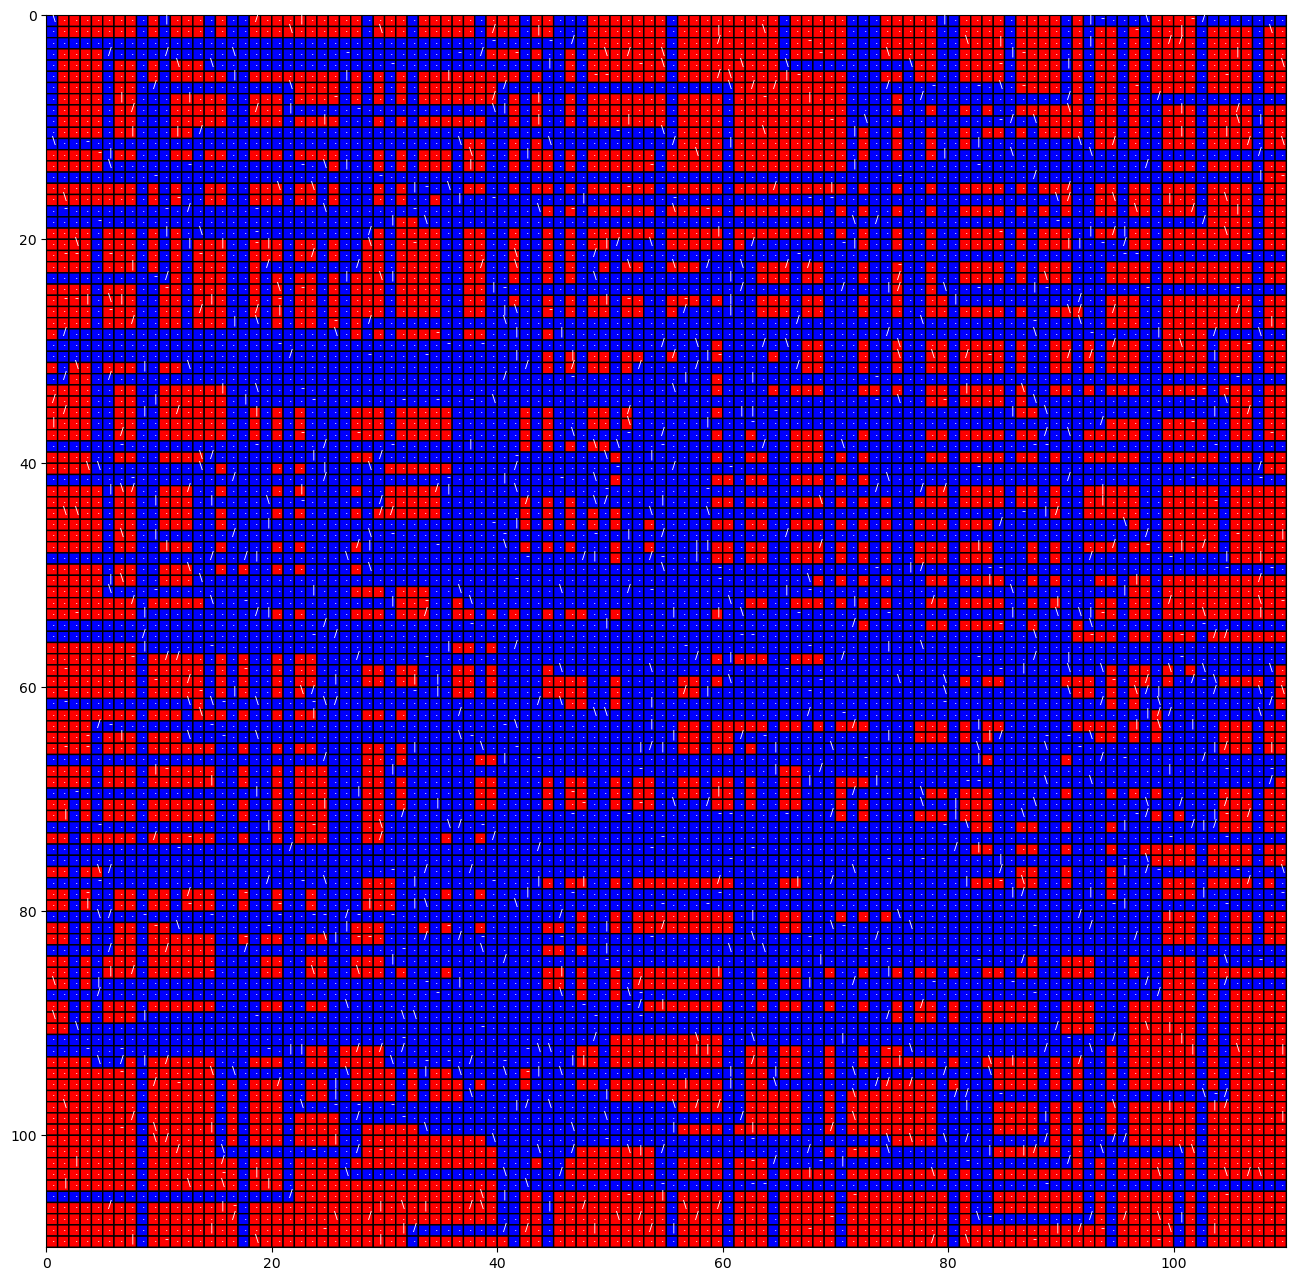

In [564]:
p.plot_array()

In [517]:
len(set(p.energized))

464

# Part 2

In [574]:
p = P()
p.load_data(f, num_cols=110, num_rows=110)
p.run_bfs((0,0),(1,0))

In [569]:
corners = [((0,0), (1,0)),
           ((0,0), (0,1)),
           ((109,0), (-1,0)),
           ((109,0), (0,1)),
           ((109,109), (0,-1)),
           ((109,109), (-1,0)),
           ((0,109), (1,0)),
           ((0,109), (0,-1))]
edge1=[((x,0),(0,1)) for x in range(110)]
edge2=[((109,y),(-1,0)) for y in range(110)]
edge3=[((x,109),(0,-1)) for x in range(110)]
edge4=[((0,y),(1,0)) for y in range(110)]
all_starts = edge1+edge2+edge3+edge4 + corners

In [575]:
highest_energized = 0
for i in all_starts:
    p = P()
    p.load_data(f, num_cols=110, num_rows=110)
    p.run_bfs(i[0], i[1])
    energised = len(set(p.energized))
    print(i, energised)
    if energised>highest_energized:
        highest_energized=energised
    

((0, 0), (0, 1)) 7736
((1, 0), (0, 1)) 7761
((2, 0), (0, 1)) 162
((3, 0), (0, 1)) 7738
((4, 0), (0, 1)) 7743
((5, 0), (0, 1)) 9
((6, 0), (0, 1)) 44
((7, 0), (0, 1)) 16
((8, 0), (0, 1)) 64
((9, 0), (0, 1)) 16
((10, 0), (0, 1)) 7728
((11, 0), (0, 1)) 7851
((12, 0), (0, 1)) 7737
((13, 0), (0, 1)) 7783
((14, 0), (0, 1)) 113
((15, 0), (0, 1)) 7760
((16, 0), (0, 1)) 29
((17, 0), (0, 1)) 7728
((18, 0), (0, 1)) 7733
((19, 0), (0, 1)) 7784
((20, 0), (0, 1)) 48
((21, 0), (0, 1)) 7743
((22, 0), (0, 1)) 7735
((23, 0), (0, 1)) 7739
((24, 0), (0, 1)) 157
((25, 0), (0, 1)) 7764
((26, 0), (0, 1)) 32
((27, 0), (0, 1)) 7733
((28, 0), (0, 1)) 157
((29, 0), (0, 1)) 13
((30, 0), (0, 1)) 116
((31, 0), (0, 1)) 7748
((32, 0), (0, 1)) 7728
((33, 0), (0, 1)) 7736
((34, 0), (0, 1)) 8056
((35, 0), (0, 1)) 90
((36, 0), (0, 1)) 32
((37, 0), (0, 1)) 149
((38, 0), (0, 1)) 29
((39, 0), (0, 1)) 13
((40, 0), (0, 1)) 52
((41, 0), (0, 1)) 7947
((42, 0), (0, 1)) 132
((43, 0), (0, 1)) 7783
((44, 0), (0, 1)) 51
((45, 0), (0,

In [576]:
highest_energized

8061